In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
from config import weather_api_key
from datetime import datetime
import requests

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low = -90.0, high = 90.0, size = 1500)
lngs = np.random.uniform(low = -180.0, high = 180.0, size = 1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)
coordinates

[(3.299629700959045, -138.63134932184232),
 (72.85641053558797, 175.81816407228712),
 (-25.02625849214013, -137.1466832759365),
 (-47.47263327196879, -52.96548353875522),
 (-20.09638927580619, -2.5768288947707845),
 (-40.00981843372435, -100.4532527616027),
 (-50.77685738706999, 6.286995851042121),
 (46.224169138527515, 160.13002944550038),
 (89.08432239979848, 131.87452827025714),
 (-55.253902075555835, -7.415351243209642),
 (22.196103060281175, -158.79075967965815),
 (-5.226558433811391, 121.34604643490678),
 (-8.478417354978149, 64.78573364632433),
 (-67.33977764498746, -59.52316950817955),
 (0.07130696691615412, -78.69348377520944),
 (57.68040077599096, -14.829380325699162),
 (-87.63554561112157, 75.3774193665277),
 (-35.95676905689713, 149.28316435509578),
 (-64.06600786179654, -70.45777903284721),
 (-83.45110255971065, 28.09194541026801),
 (21.455543832730243, 24.425379874565778),
 (7.103889842488641, 54.10237712041848),
 (-17.829892828767214, -138.81258566578964),
 (16.093541278

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count.
len(cities)

600

In [5]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=" + weather_api_key


In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ", "+")
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
#     If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass
    
# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | atuona
Processing Record 2 of Set 1 | leningradskiy
Processing Record 3 of Set 1 | rikitea
Processing Record 4 of Set 1 | mar del plata
Processing Record 5 of Set 1 | jamestown
Processing Record 6 of Set 1 | ancud
Processing Record 7 of Set 1 | cape town
Processing Record 8 of Set 1 | severo-kurilsk
Processing Record 9 of Set 1 | tiksi
Processing Record 10 of Set 1 | kapaa
Processing Record 11 of Set 1 | sinjai
Processing Record 12 of Set 1 | victoria
Processing Record 13 of Set 1 | ushuaia
Processing Record 14 of Set 1 | quito
Processing Record 15 of Set 1 | westport
Processing Record 16 of Set 1 | busselton
Processing Record 17 of Set 1 | cooma
Processing Record 18 of Set 1 | kruisfontein
Processing Record 19 of Set 1 | faya
Processing Record 20 of Set 1 | bandarbeyla
Processing Record 21 of Set 1 | saint-louis
Processing Record 22 of Set 1 | castro
Processing Record 23 of Set 1 | cabo san luca

Processing Record 38 of Set 4 | padang
Processing Record 39 of Set 4 | russell
Processing Record 40 of Set 4 | qaanaaq
Processing Record 41 of Set 4 | sakakah
Processing Record 42 of Set 4 | sorong
Processing Record 43 of Set 4 | baturaja
Processing Record 44 of Set 4 | puntarenas
Processing Record 45 of Set 4 | thinadhoo
Processing Record 46 of Set 4 | villazon
Processing Record 47 of Set 4 | xuddur
Processing Record 48 of Set 4 | ust-bolsheretsk
City not found. Skipping...
Processing Record 49 of Set 4 | kodinsk
Processing Record 50 of Set 4 | mpraeso
Processing Record 1 of Set 5 | sola
Processing Record 2 of Set 5 | gladstone
Processing Record 3 of Set 5 | davila
Processing Record 4 of Set 5 | nizhneyansk
City not found. Skipping...
Processing Record 5 of Set 5 | seoul
Processing Record 6 of Set 5 | bowling green
Processing Record 7 of Set 5 | bjornevatn
Processing Record 8 of Set 5 | sentyabrskiy
City not found. Skipping...
Processing Record 9 of Set 5 | shumyachi
Processing Record

Processing Record 31 of Set 8 | korhogo
Processing Record 32 of Set 8 | tara
Processing Record 33 of Set 8 | cabinda
Processing Record 34 of Set 8 | jabiru
City not found. Skipping...
Processing Record 35 of Set 8 | lata
Processing Record 36 of Set 8 | satana
Processing Record 37 of Set 8 | west plains
Processing Record 38 of Set 8 | thayetmyo
Processing Record 39 of Set 8 | corum
Processing Record 40 of Set 8 | inta
Processing Record 41 of Set 8 | touros
Processing Record 42 of Set 8 | karak
Processing Record 43 of Set 8 | puerto el triunfo
Processing Record 44 of Set 8 | lasem
Processing Record 45 of Set 8 | korla
Processing Record 46 of Set 8 | beloha
Processing Record 47 of Set 8 | hervey bay
Processing Record 48 of Set 8 | omboue
Processing Record 49 of Set 8 | amparafaravola
Processing Record 50 of Set 8 | soyo
Processing Record 1 of Set 9 | lufilufi
Processing Record 2 of Set 9 | luganville
Processing Record 3 of Set 9 | yingzhong
City not found. Skipping...
Processing Record 4 

Processing Record 21 of Set 12 | salinopolis
Processing Record 22 of Set 12 | banda aceh
Processing Record 23 of Set 12 | ostrovnoy
Processing Record 24 of Set 12 | kaseda
Processing Record 25 of Set 12 | mount vernon
Processing Record 26 of Set 12 | tortoli
Processing Record 27 of Set 12 | mayo
Processing Record 28 of Set 12 | mahanje
Processing Record 29 of Set 12 | los llanos de aridane
Processing Record 30 of Set 12 | topeka
Processing Record 31 of Set 12 | venado tuerto
Processing Record 32 of Set 12 | asau
Processing Record 33 of Set 12 | honiara
Processing Record 34 of Set 12 | jinan
Processing Record 35 of Set 12 | clinton
Processing Record 36 of Set 12 | taoudenni
Processing Record 37 of Set 12 | tarko-sale
Processing Record 38 of Set 12 | timra
Processing Record 39 of Set 12 | sarh
Processing Record 40 of Set 12 | limulunga
Processing Record 41 of Set 12 | tumannyy
City not found. Skipping...
Processing Record 42 of Set 12 | tottori
Processing Record 43 of Set 12 | kasama
Pro

In [7]:
city_data

[{'City': 'Atuona',
  'Lat': -9.8,
  'Lng': -139.0333,
  'Max Temp': 78.49,
  'Humidity': 67,
  'Cloudiness': 5,
  'Wind Speed': 9.48,
  'Country': 'PF',
  'Date': '2021-02-04 03:32:59'},
 {'City': 'Leningradskiy',
  'Lat': 69.3833,
  'Lng': 178.4167,
  'Max Temp': -26.52,
  'Humidity': 85,
  'Cloudiness': 11,
  'Wind Speed': 6.85,
  'Country': 'RU',
  'Date': '2021-02-04 03:32:24'},
 {'City': 'Rikitea',
  'Lat': -23.1203,
  'Lng': -134.9692,
  'Max Temp': 78.06,
  'Humidity': 71,
  'Cloudiness': 0,
  'Wind Speed': 12.66,
  'Country': 'PF',
  'Date': '2021-02-04 03:37:16'},
 {'City': 'Mar Del Plata',
  'Lat': -38.0023,
  'Lng': -57.5575,
  'Max Temp': 66.2,
  'Humidity': 77,
  'Cloudiness': 20,
  'Wind Speed': 10.36,
  'Country': 'AR',
  'Date': '2021-02-04 03:37:16'},
 {'City': 'Jamestown',
  'Lat': 42.097,
  'Lng': -79.2353,
  'Max Temp': 21.99,
  'Humidity': 86,
  'Cloudiness': 1,
  'Wind Speed': 16.11,
  'Country': 'US',
  'Date': '2021-02-04 03:37:16'},
 {'City': 'Ancud',
  'Lat':

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Atuona,-9.8000,-139.0333,78.49,67,5,9.48,PF,2021-02-04 03:32:59
1,Leningradskiy,69.3833,178.4167,-26.52,85,11,6.85,RU,2021-02-04 03:32:24
2,Rikitea,-23.1203,-134.9692,78.06,71,0,12.66,PF,2021-02-04 03:37:16
3,Mar Del Plata,-38.0023,-57.5575,66.20,77,20,10.36,AR,2021-02-04 03:37:16
4,Jamestown,42.0970,-79.2353,21.99,86,1,16.11,US,2021-02-04 03:37:16
5,Ancud,-41.8697,-73.8203,59.00,88,0,5.75,CL,2021-02-04 03:37:16
6,Cape Town,-33.9258,18.4232,68.00,82,20,14.97,ZA,2021-02-04 03:37:16
7,Severo-Kurilsk,50.6789,156.1250,10.99,92,100,31.43,RU,2021-02-04 03:37:16
8,Tiksi,71.6872,128.8694,-24.90,86,99,2.26,RU,2021-02-04 03:37:16
9,Kapaa,22.0752,-159.3190,73.40,53,1,9.22,US,2021-02-04 03:36:27


In [9]:
city_data_df = city_data_df[["City",'Country','Date','Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed']]

In [10]:
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Atuona,PF,2021-02-04 03:32:59,-9.8000,-139.0333,78.49,67,5,9.48
1,Leningradskiy,RU,2021-02-04 03:32:24,69.3833,178.4167,-26.52,85,11,6.85
2,Rikitea,PF,2021-02-04 03:37:16,-23.1203,-134.9692,78.06,71,0,12.66
3,Mar Del Plata,AR,2021-02-04 03:37:16,-38.0023,-57.5575,66.20,77,20,10.36
4,Jamestown,US,2021-02-04 03:37:16,42.0970,-79.2353,21.99,86,1,16.11
...,...,...,...,...,...,...,...,...,...
550,Lulindi,TZ,2021-02-04 03:38:29,-10.8167,39.1333,70.74,92,100,1.25
551,Dongsheng,CN,2021-02-04 03:38:29,39.8161,109.9776,29.66,63,0,16.73
552,Mareeba,AU,2021-02-04 03:38:29,-17.0000,145.4333,87.80,70,93,9.22
553,Yumen,CN,2021-02-04 03:34:05,40.2833,97.2000,32.23,63,19,30.06


In [11]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [12]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

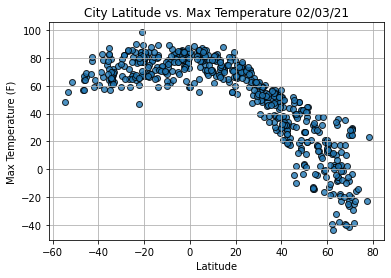

In [13]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,max_temps,edgecolor = "black", linewidths = 1, marker = "o", alpha = 0.8, label = "Cities")

plt.title(f"City Latitude vs. Max Temperature " + time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

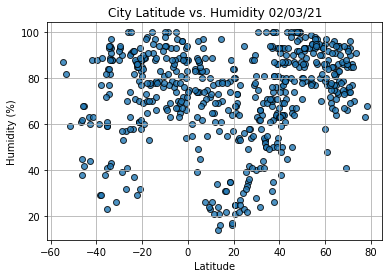

In [14]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

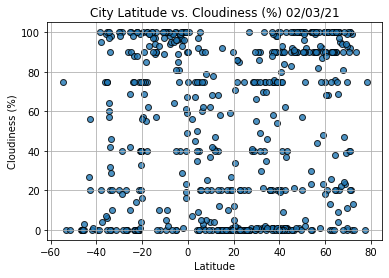

In [15]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

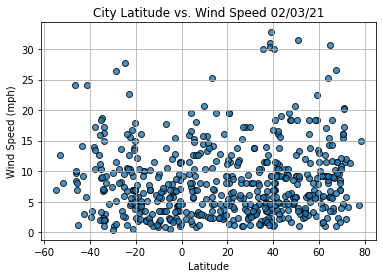

In [16]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [17]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [21]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

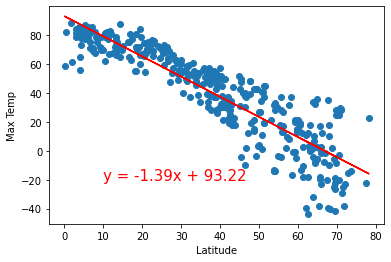

In [23]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, 
                      y_values, 'Linear Regression on the Northern Hemisphere \
                      for Maximum Temperature', 'Max Temp',(10,-20))

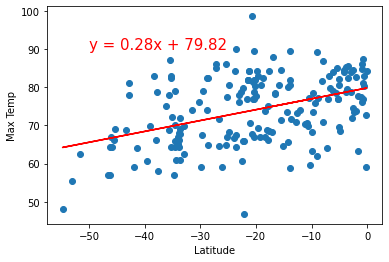

In [24]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

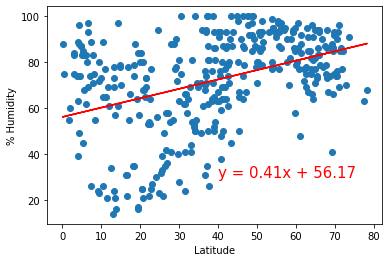

In [26]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,30))

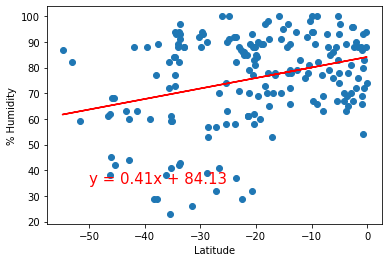

In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,35))

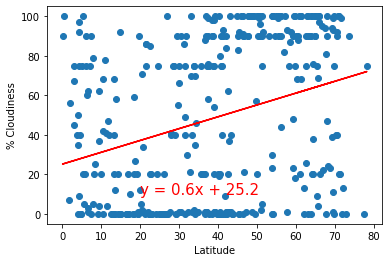

In [30]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(20,10))

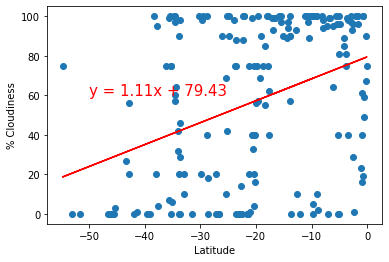

In [32]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

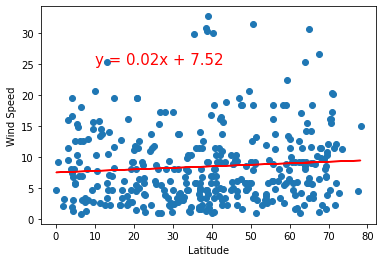

In [37]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(10,25))

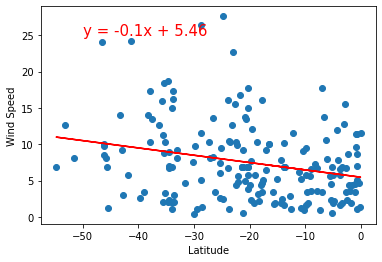

In [40]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,25))